# Demodulación de FM

El osciloscopio es un instrumento de cabecera en la electrónica, pero dentro de comunicaciones, no es tan importante como el analizador de espectro o no lo tenemos tanto en cuenta. No obstante tambien el analizador de espectro puede no tener las herramientas para demodular FM, para lo cual unicamente contamos con las funciones de Bessel.

Esta practica esta pensada para enter como modular y demodular FM, y ademas poder usar un osciloscopio para analizar señales con modulacion angular

In [1]:
####################################
### los imports de rigor ###########
####################################

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as dsp

Nos armamos una linda función para plotear espectros cada vez que lo necesitemos.

In [2]:
def plot_spec(signal,fs,tipo="full",win="rect"):
    espec=20*np.log10(np.abs(np.fft.fft(signal))/len(signal))
    espec=np.fft.fftshift(espec)
    fcia=np.linspace(-fs/2,fs/2,len(signal))
    if tipo=="half":
        espec=espec[len(signal)//2:]
        fcia=fcia[len(signal)//2:]
    plt.figure()
    plt.title('Espectro de la señal')
    plt.ylim(np.max(espec)-75,np.max(espec)+5)
    plt.plot(fcia,espec)

## Modulacion en frecuencia
Vamos a definir los parametros minimos de una señal modulada en FM

In [3]:
##### constantes ######
deltaf=75000   # desviación de fm comercial
fmsj=5e3      # frecuencia de mensaje
m=deltaf/fmsj # indice de modulacion de fm, el parametro que usamos para entrar a Bessel
fc=500e3      # frecuencia de portadora


Los parametros del osciloscopio, tipo Tektronix TDS2000

In [4]:
############################
### Parametros del DSO  ####
############################

N=2500
fbt=100e-6
div=10
fs=N/(fbt*div)
t=np.linspace(0,N/fs,N)
print("ts = {} s".format(t[1]))
print("f_Nys= {} Hz ".format(fs/2))
print("fs",fs)

ts = 4.001600640256103e-07 s
f_Nys= 1250000.0 Hz 
fs 2500000.0


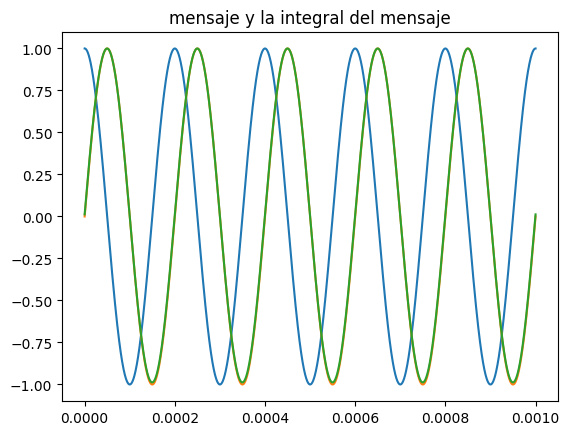

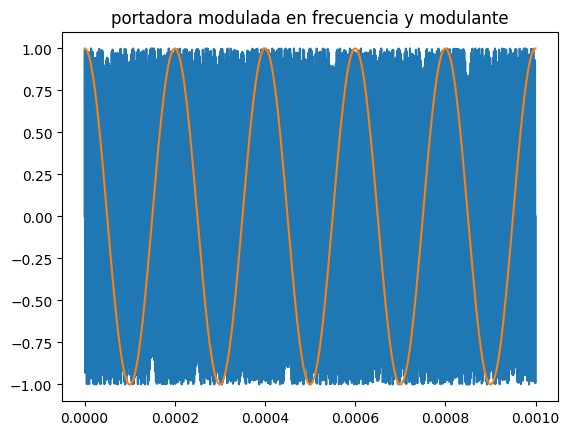

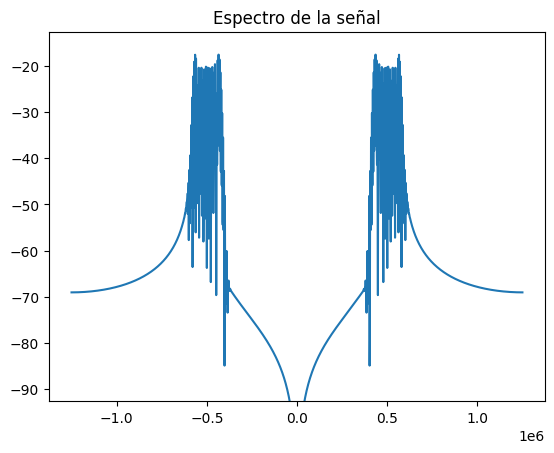

In [5]:
################################################################################
####### senoidal modulada en frecuencia ########################################
################################################################################

msj=np.cos(2*np.pi*fmsj*t)  # mensaje
modulante=np.sin(2*np.pi*fmsj*t) ### en fm la modulante queda integrada
modulante1=np.cumsum(msj)/np.max(np.cumsum(msj))  ### una manera de hacer la integral numericamente
plt.figure()
plt.plot(t,msj,t,modulante,t,modulante1)
plt.title("mensaje y la integral del mensaje")

fmcomercial=np.sin(2*np.pi*fc*t+m*modulante)
plt.figure()
plt.title("portadora modulada en frecuencia y modulante")
plt.plot(t,fmcomercial,t,msj)
plot_spec(fmcomercial,fs,tipo="full")

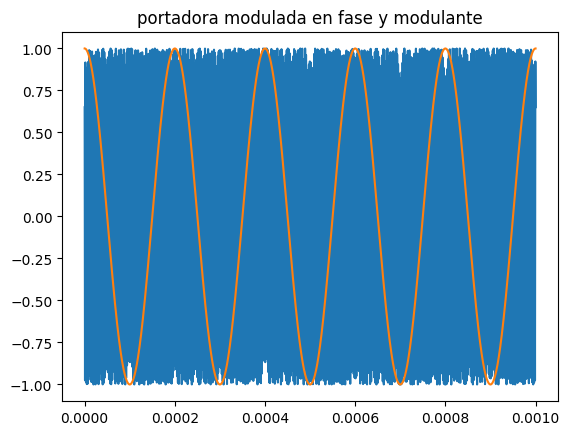

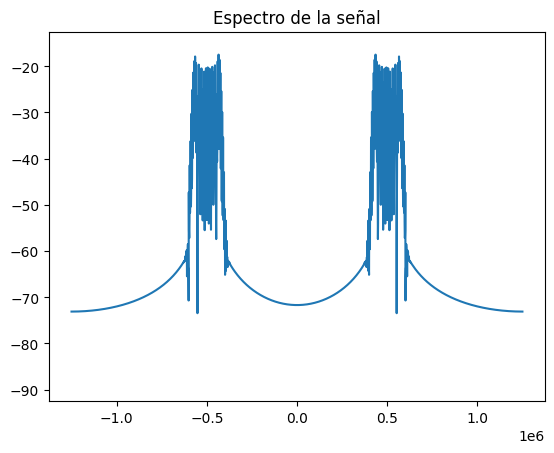

In [7]:
################################################################################
####### senoidal modulada en fase ##############################################
################################################################################

msj=np.cos(2*np.pi*fmsj*t)  # mensaje

fm=np.sin(2*np.pi*fc*t+m*msj)
plt.figure()
plt.title("portadora modulada en fase y modulante")
plt.plot(t,fm,t,msj)
plot_spec(fm,fs,tipo="full")

## Algunos ejemplos
 - cuadrada

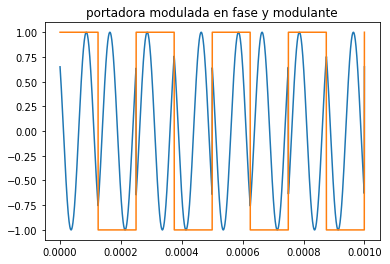

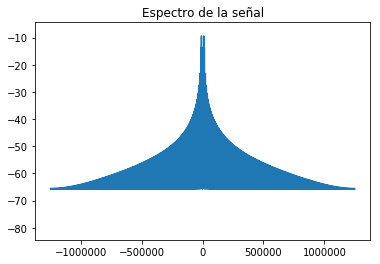

In [7]:
################################################################################
####### cuadrada modulada en fase ##############################################
################################################################################

## cambio la frecuencia de la portadora y el mensaje para que se note el cambio de fase cuando pasa de 0 a 1
## esta modulacion es PSK  ## phase shift keying

fmsj=4e3      # frecuencia de mensaje
fc=10e3       # frecuencia de portadora

msj=dsp.square(2*np.pi*fmsj*t)  # mensaje

fm=np.sin(2*np.pi*fc*t+m*msj)
plt.figure()
plt.title("portadora modulada en fase y modulante")
plt.plot(t,fm,t,msj)
plot_spec(fm,fs,tipo="full")

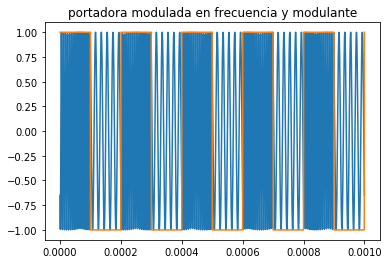

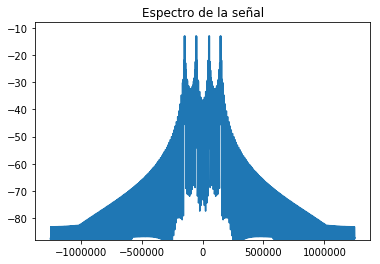

In [8]:
################################################################################
####### cuadrada modulada en frecuencia ########################################
################################################################################

###########################################################
### esta el la famosa FSK  - Frequency shift keying     ###
### se usa en muchos lados, controles, remotos, alarmas ###
###########################################################

##### constantes ######
deltaf=75000   # desviación de fm comercial
fmsj=5e3      # frecuencia de mensaje
m=deltaf/fmsj # indice de modulacion de fm, el parametro que usamos para entrar a Bessel
fc=100e3      # frecuencia de portadora

msj=dsp.square(2*np.pi*fmsj*t)  # mensaje
modulante=dsp.sawtooth(2*np.pi*fmsj*t,0.5) ### en fm la modulante queda integrada 

fm=np.sin(2*np.pi*fc*t+m*modulante)
plt.figure()
plt.title("portadora modulada en frecuencia y modulante")
plt.plot(t,fm,t,msj)
plot_spec(fm,fs,tipo="full")

# La realidad es mas compleja :)
## Envolvente compleja

hasta ahora, todas las aproximaciones que hicimos fueron con señales reales. se obtiene de trabajar con osciladores reales, VCO (controlados por tension).
En la actualidad hay un circuito que cambio todo, EL MODULADOR IQ, que nos permite directamente trabajar con numeros complejos.

Text(0.5,1,'Espectro banda base triangular')

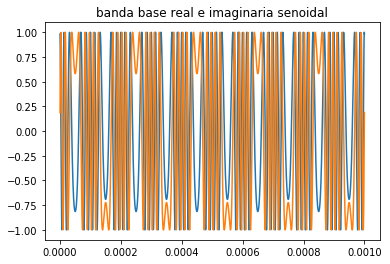

<Figure size 432x288 with 0 Axes>

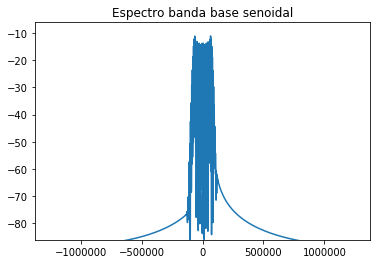

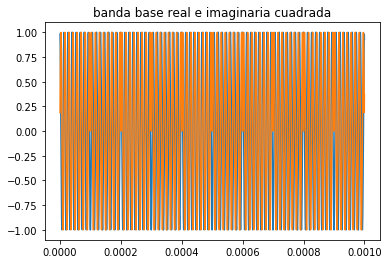

<Figure size 432x288 with 0 Axes>

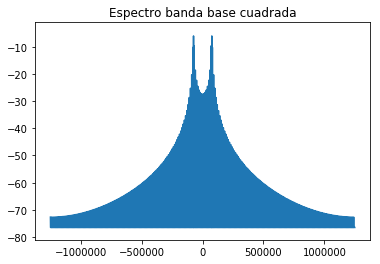

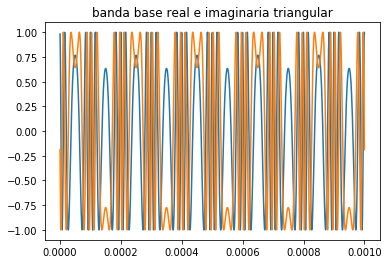

<Figure size 432x288 with 0 Axes>

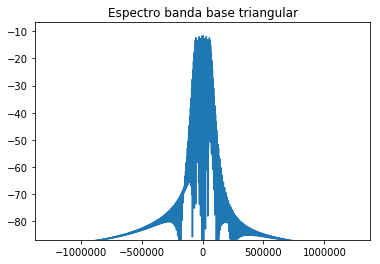

In [9]:
### https://wiki.gnuradio.org/index.php/Frequency_Mod

msj=np.cos(2*np.pi*fmsj*t)  # mensaje

def mod_FM(mensaje,deltaf,fs):
    return np.exp((2j*np.pi*deltaf/fs)*np.cumsum(mensaje))

fm=mod_FM(msj,75e3,fs)
plt.figure()
plt.plot(t,fm.real,t,fm.imag)
plt.title("banda base real e imaginaria senoidal")

plt.figure()
plot_spec(fm,fs)
plt.title("Espectro banda base senoidal")

msj=dsp.square(2*np.pi*fmsj*t)
fm=mod_FM(msj,75e3,fs)

plt.figure()
plt.plot(t,fm.real,t,fm.imag)
plt.title("banda base real e imaginaria cuadrada")

plt.figure()
plot_spec(fm,fs)
plt.title("Espectro banda base cuadrada")

msj=dsp.sawtooth(2*np.pi*fmsj*t,0.5)
fm=mod_FM(msj,75e3,fs)

plt.figure()
plt.plot(t,fm.real,t,fm.imag)
plt.title("banda base real e imaginaria triangular")

plt.figure()
plot_spec(fm,fs)
plt.title("Espectro banda base triangular")

### Diagrama en bloques de un receptor SDR

este esque corresponde al receptor mas economico el RTL-SDR. Hay mucha info en iternet.

De su diagrama se observa un amplificador de ganacia variable de bajo ruido (LNA) un filtro cuya principal funcion es rechazar frecuencias imagen un circuito heterodino que genera con un mezclador un FI de 3.57MHz

Luego biene el receptor IQ que descompone la FI en I y en Q

<img src="SDR.bmp">

### Demodulador de cuadratura

<img src="IQ.bmp">

### Implementamos el filtro pasabajos

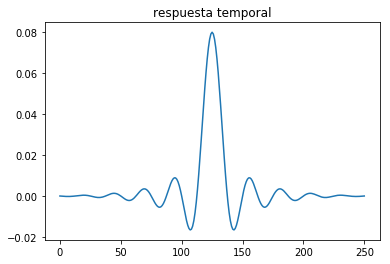

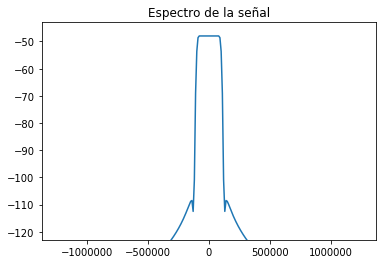

In [10]:
filtro=dsp.firwin(251,200e3/fs)
plt.title("respuesta temporal")
plt.plot(filtro) 
plot_spec(filtro,fs)

## Simulemos todo el proceso de recepcion

Utilizando nuevamente la variable "fmcomercial" que tenia una señal real (coseno) modulada por "msj" 

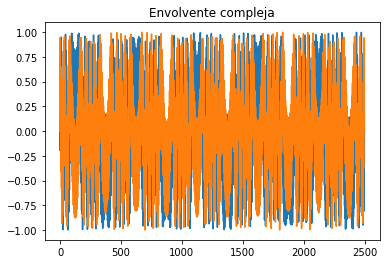

<Figure size 432x288 with 0 Axes>

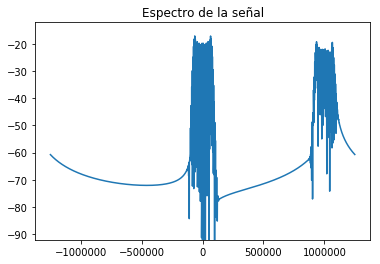

<Figure size 432x288 with 0 Axes>

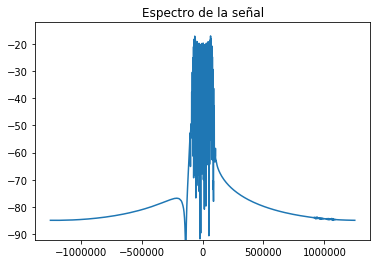

In [11]:
error=0
fc=500e3      # frecuencia de portadora

## este primer producto genera una banda base compleja de la señal... logicamente se produce un salto a 2fc 
## que debemos borrar con el filtro diseñado anteriormente

ComplexEnvelope=fmcomercial*np.power(np.e,1j*2*np.pi*(fc+error)*t)
ComplexEnvelope_filt=np.convolve(filtro,ComplexEnvelope,mode="same")

## tenemos nuestra banda base compleja !!!

plt.figure()
plt.title("Envolvente compleja")
plt.plot(np.real(ComplexEnvelope))
plt.plot(np.imag(ComplexEnvelope))
plt.figure()
plot_spec(ComplexEnvelope,fs,tipo="full")
plt.figure()
plot_spec(ComplexEnvelope_filt,fs,tipo="full")


Hasta aca llegamos a obtener la banda base compleja de la señal de FM que generamos. De aqui en adelante implementaremos la version digital de un demodulador de cuadratura

### Demodulador de cuadratura

<img src="cuad_demod.bmp">

## $ y[t]=arg(x[t]*conj(x[t-1]))$

In [12]:
### demodulacion en cuadratura ####


def FM_demod (señal,fs):
    return np.angle(señal[:-1]*np.conjugate(señal[1:]))*fs/(2*np.pi)


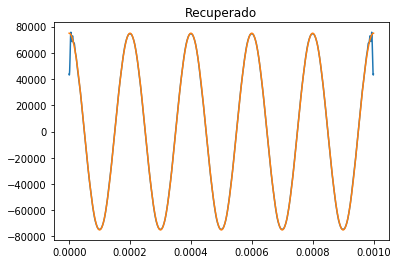

In [13]:
msj=np.cos(2*np.pi*fmsj*t)  # mensaje

demod= FM_demod(ComplexEnvelope_filt,fs)
plt.figure()
plt.title("Recuperado")
plt.plot(t[:-1],demod)
plt.plot(t,msj*75e3)


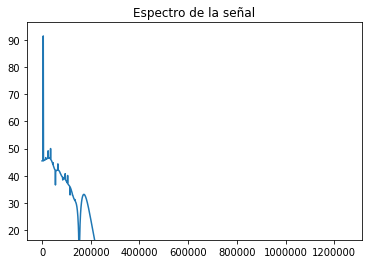

In [14]:
plot_spec(demod,fs,tipo="half")

# Analizador de modulación
Que podemos sacar del grafico recuperado


<img src="fam.bmp">

Igual que sucede con un multimetro cuando mide señales no senoidales, aparece el mismo problema cuando se quiere medir la desviación de frecuencia como la salida de un discriminador de FM. Podemos detectar el pico, que correspondera a la desviacion pico o podemos detectar la desviación de frecuencia eficaz, si estamos modulando señales complejas. De todas formas toda la informacion esta disponible en la señal demodulada!!

### - Desviacion Pico+ - Pico-
### - Desviación RMS


In [15]:
print("Desviación Pico+ {} Hz / Desviación Pico- {} Hz".format(np.max(demod),np.min(demod)))
print("Desviación RMS {} Hz".format(np.sqrt(np.mean(demod**2))))


Desviación Pico+ 75735.80523411537 Hz / Desviación Pico- -74593.38310421517 Hz
Desviación RMS 52837.346688877464 Hz


### - Frecuencia de la portadora
El offset de frecuencia respecto de la portadora corresponde al valor medio de la señal demodulada. Es decir, valor medio cero indica que esta centrada. NOTA: especial cuidado a que si la cantidad de ciclos no es entera vamos a tener un error!! para eso ventaneamos


Error de frecuencia p+p- 571.2110649500974 Hz
Error de frecuencia -187.86030880309173 Hz
Error de frecuencia con ventana -14.427491020945673 Hz


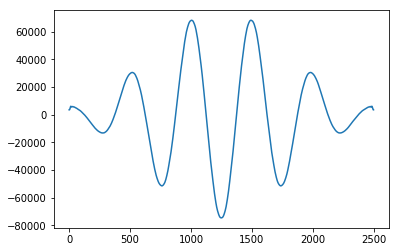

In [16]:
win=dsp.windows.hamming(len(demod))
print("Error de frecuencia p+p- {} Hz".format((np.max(demod)+np.min(demod))/2))
print("Error de frecuencia {} Hz".format(np.mean(demod)))
print("Error de frecuencia con ventana {} Hz".format(np.mean(demod*win)))
plt.plot(demod*win)

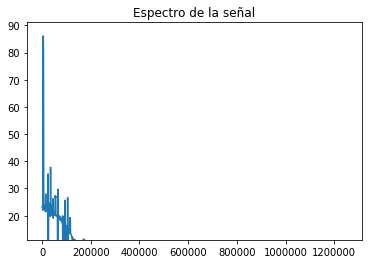

In [17]:
plot_spec(demod*win,fs,tipo="half")